<a href="https://colab.research.google.com/github/LeaCarop/California_Housing/blob/main/API_funcional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## API FUNCIONAL

#### CON UNA SOLA ENTRADA

In [20]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [21]:
housing = fetch_california_housing()   # a diferencia del otro dataset, este es más sencillo, solo tiene variables numéricas

# conjunto de entrenamiento, validación y prueba
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state=42)

In [22]:
#  para escalar todas las características y las devuelva en un mismo rango
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [23]:
# MODELO
entrada = keras.layers.Input(shape=x_train.shape[1:])
oculta1 = keras.layers.Dense(30, activation="relu")(entrada)
oculta2 = keras.layers.Dense(30, activation="relu")(oculta1)
concat = keras.layers.concatenate([entrada, oculta2]) # capa para concatenar la entrada y la salida de oculta2
salida = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[entrada], outputs=[salida])

In [24]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 30)           270         ['input_4[0][0]']                
                                                                                                  
 dense_10 (Dense)               (None, 30)           930         ['dense_9[0][0]']                
                                                                                                  
 concatenate_3 (Concatenate)    (None, 38)           0           ['input_4[0][0]',                
                                                                  'dense_10[0][0]']         

In [25]:
# COMPILAR Y ENTRENAR MODELO
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.1210 - val_loss: 0.8383
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.7215 - val_loss: 0.6694
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6314 - val_loss: 0.5952
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5932 - val_loss: 0.6414
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5686 - val_loss: 0.5825
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5475 - val_loss: 0.5226
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5285 - val_loss: 0.4859
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5128 - val_loss: 0.4783
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4996 - val_loss: 0.4709
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4887 - val_loss: 0.4499

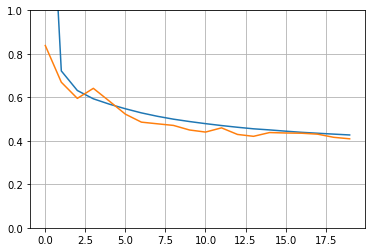

In [26]:
import matplotlib.pyplot as plt

plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [27]:
mse_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 3ms/step - loss: 0.4185


#### CON MÚLTIPLES ENTRADAS (RED NEURONAL NO SECUENCIAL)

In [32]:
# MODELO
entrada_A = keras.layers.Input(shape=[5], name="wide_input")  # envío 5 características por la ruta ancha
entrada_B = keras.layers.Input(shape=[6], name="deep_input")  # y 6 por la profunda
oculta1 = keras.layers.Dense(30, activation="relu")(entrada_B)
oculta2 = keras.layers.Dense(30, activation="relu")(oculta1)
concat = keras.layers.concatenate([entrada_A, oculta2])
salida = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[entrada_A, entrada_B], outputs=[salida])

In [33]:
# COMPILAR MODELO
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

x_train_A, x_train_B = x_train[:, :5], x_train[:, 2:]
x_valid_A, x_valid_B = x_valid[:, :5], x_valid[:, 2:]
x_test_A, x_test_B = x_test[:, :5], x_test[:, 2:]
x_new_A, x_new_B = x_test_A[:3], x_test_B[:3]

In [34]:
# ENTRENAMIENTO
history = model.fit((x_train_A, x_train_B), y_train, epochs=20,
                    validation_data=((x_valid_A, x_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.6252 - val_loss: 1.0112
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.8276 - val_loss: 0.8064
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.7034 - val_loss: 0.6770
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6596 - val_loss: 0.6261
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6287 - val_loss: 0.5975
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6002 - val_loss: 0.5747
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5741 - val_loss: 0.5557
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5496 - val_loss: 0.5222
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5283 - val_loss: 0.5075
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5100 - val_loss: 0.4744

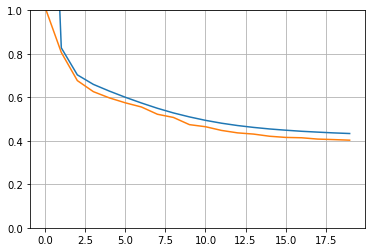

In [35]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [36]:
mse_test = model.evaluate((x_test_A, x_test_B), y_test)

162/162 [==============================] - 1s 4ms/step - loss: 0.4285


In [38]:
y_hat = model.predict((x_new_A, x_new_B))
y_hat

array([[0.56681025],
       [2.0006268 ],
       [3.240996  ]], dtype=float32)

#### CON MÚLTIPLES ENTRADAS y SALIDA AUXILIAR (RED NEURONAL NO SECUENCIAL)
El objetivo de una salida auxiliar es que la red aprenda algo por su cuenta y no sea dependiente del resto de la red neuronal.

In [51]:
# MODELO
entrada_A = keras.layers.Input(shape=[5], name="wide_input")  # envío 5 características por la ruta ancha
entrada_B = keras.layers.Input(shape=[6], name="deep_input")  # y 6 por la profunda
oculta1 = keras.layers.Dense(30, activation="relu")(entrada_B)
oculta2 = keras.layers.Dense(30, activation="relu")(oculta1)
concat = keras.layers.concatenate([entrada_A, oculta2])
salida = keras.layers.Dense(1, name="main_output")(concat)
aux_salida = keras.layers.Dense(1, name="aux_output")(oculta2)  # creo la capa auxiliar
model = keras.models.Model(inputs=[entrada_A, entrada_B],
                           outputs=[salida, aux_salida])

In [52]:
# COMPILAR MODELO
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3)) 
# cada capa de salida necesita su función de pérdida

In [53]:
# ENTRENAMIENTO
history = model.fit([x_train_A, x_train_B], [y_train, y_train], epochs=20,
                    validation_data=([x_valid_A, x_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 4s 7ms/step - loss: 2.3622 - main_output_loss: 1.9593 - aux_output_loss: 5.9883 - val_loss: 1.8544 - val_main_output_loss: 1.5598 - val_aux_output_loss: 4.5050
Epoch 2/20
363/363 [==============================] - 2s 6ms/step - loss: 1.0570 - main_output_loss: 0.7714 - aux_output_loss: 3.6275 - val_loss: 1.0763 - val_main_output_loss: 0.7276 - val_aux_output_loss: 4.2148
Epoch 3/20
363/363 [==============================] - 2s 6ms/step - loss: 0.8507 - main_output_loss: 0.6803 - aux_output_loss: 2.3846 - val_loss: 1.1958 - val_main_output_loss: 0.7863 - val_aux_output_loss: 4.8815
Epoch 4/20
363/363 [==============================] - 2s 6ms/step - loss: 0.7577 - main_output_loss: 0.6357 - aux_output_loss: 1.8552 - val_loss: 1.0824 - val_main_output_loss: 0.6235 - val_aux_output_loss: 5.2126
Epoch 5/20
363/363 [==============================] - 2s 7ms/step - loss: 0.7035 - main_output_loss: 0.6016 - aux_output_loss: 1.6209 - val_loss

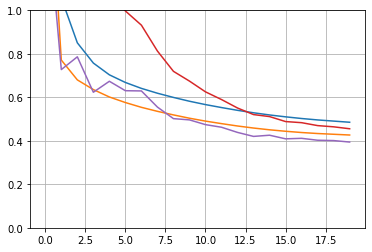

In [54]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [55]:
total_loss, main_loss, aux_loss = model.evaluate(
    [x_test_A, x_test_B], [y_test, y_test])
y_hat_main, y_hat_aux = model.predict([x_new_A, x_new_B])

162/162 [==============================] - 1s 5ms/step - loss: 0.4748 - main_output_loss: 0.4176 - aux_output_loss: 0.9889
